In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import keras
import sklearn as sk
import random
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# The original dataset that was taken for the analysis
df_original = pd.read_csv('crop_production.csv')
df_original.head()
# The above dataset has a lot of NA values and hence another code was written to clean the dataset and a new csv was generated with no NA values
df_clean = pd.read_csv('TrimmedAgro.csv')
df_clean.head() # This csv was clean and without any NA values.

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,145299,Nagaland,PHEK,2006,Kharif,Cotton(lint),20.0,10.0
1,145322,Nagaland,PHEK,2007,Kharif,Cotton(lint),20.0,10.0
2,145347,Nagaland,PHEK,2008,Kharif,Cotton(lint),20.0,10.0
3,145353,Nagaland,PHEK,2008,Kharif,Moong(GreenGram),30.0,10.0
4,145372,Nagaland,PHEK,2008,Rabi,Urad,20.0,10.0


In [3]:
# Now that the clean data was achieved we group the data in order to seperate them from each other year and season wise.
# That csv will be called "final_group.csv"

# The code for the conversion:
subset = df_clean[['District_Name','Season','Crop_Year','Crop','Area','Production']]
df_grouped = subset.groupby(['District_Name','Season','Crop_Year'], as_index = False)
tuples = [tuple(x) for x in subset.values]



with open("final_group.csv","w") as f:
    for name, group in df_grouped:
        group.sort_values('Crop_Year', ascending = True).to_csv(f,header = False)

In [4]:
# Now the first important step would be to find the linearity in the dataset and we start with the basic linear regression model.

# The dataset is very huge. It has about 1.5million records.
# Performing regression on all of them is not feasible so we will apply it to only a sample of the dataset just to see whether the datste is normal or not.
# In the particular analysis we will try to see if the Area and Production in the dataset share any relation in the dataset at all.

# Linear regression is the method by which we predict a dependent variable with respect to an independent variable.
# Two variables are linearly related if the independen variable can predict the dependent variable as accurately as possible given the function.


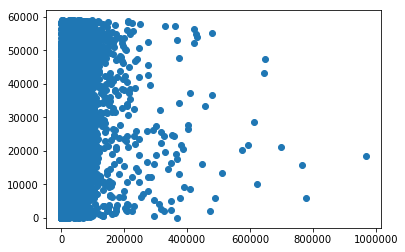

In [5]:
plt.scatter(df_clean['Area'],df_clean['Production'])
# As we can see from the plt below the dataset is not at all linear.

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
57807,37907,Bihar,NALANDA,2001,Rabi,Peas & beans (Pulses),197.0,194.0
136406,135806,Maharashtra,SATARA,2011,Kharif,Urad,4400.0,3000.0
60032,158142,Odisha,PURI,1999,Kharif,Maize,230.0,200.0
35726,123565,Madhya Pradesh,TIKAMGARH,2004,Whole Year,Garlic,39.0,85.0
21218,152016,Odisha,JAGATSINGHAPUR,2002,Rabi,Gram,50.0,40.0


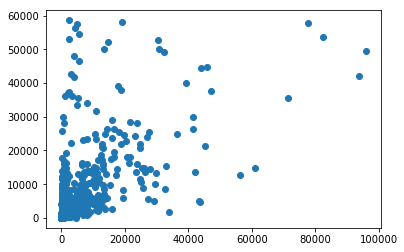

In [6]:
# Now if we test with a sample it would be more conclusive
df_sample = df_clean.sample(1000)

plt.scatter(df_sample.Area, df_sample.Production)

# As we can see that the data is not linear at all

# Now we can still go ahead and find the line of best fit for the given data.
df_sample.head()

The estimated coefficients = 
b_0 = -5.537172924618972e-07 \ nb_1 = 0.9700173616544


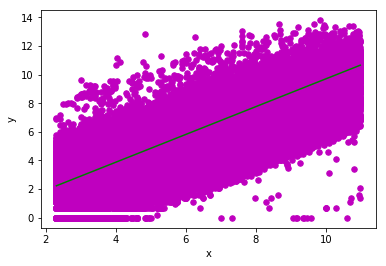

[[ 1.          0.51557413]
 [ 0.51557413  1.        ]]
3034.78232554


In [44]:
# h(x_i) = \beta _0 + \beta_1x_i - The equation to get the line of best fit

# Now we write the functions to get the coeffiecients
def estimate_coeff(x, y):
    # get the size
    n = np.size(x)
    
    # The means of x and y
    m_x, m_y = np.mean(x), np.mean(y)
    
    # Calculating the deviations
    SS_xy = np.sum(y*x - n*m_y*m_x)
    SS_xx = np.sum(x*x - n*m_x*m_x)
    
    # Calculating the regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    
    return(b_0, b_1)

# Function to plot the line of best fit
def plot_regression_line(x, y, b):
    
    # Plot the actual data
    plt.scatter(x, y, color = "m", marker="o", s = 30)
    
    # Predicted vector
    y_pred = b[0] + b[1]*x
    
    # plt the regression line
    plt.plot(x, y_pred, color = "g")
    
    # Labels
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.show()
    return y_pred
    
# Now we call the functions on our dataset

x = np.array(list(np.log(df_clean.Area)))
y = np.array(list(np.log(df_clean.Production)))
estimate = estimate_coeff(y,x)

print("The estimated coefficients = \nb_0 = {} \ nb_1 = {}". format(estimate[0], estimate[1]))

y_pred = plot_regression_line(y,x, estimate)

df_clean['Predicted'] = np.exp(y_pred)
# print(df_clean.head())

# To see it in a csv format execute the code below by uncommenting it
# df_clean.to_csv("Predicted.csv")
# As seen from the  given plot the line of best fit are close but not very close from the original values  and hence we don't reject the whole model as such.
print(np.corrcoef(df_clean.Production, df_clean.Area))
# As we can see that the correlation coefficient for the dataset r = 0.51557413 , it is positively correlated but it is not conclusive proof that area and production are correlated.
# Hence we move to teh non-linear model.

# Calculating teh rmse values
from sklearn.metrics import mean_squared_error
meanSquaredError=mean_squared_error(np.exp(y), np.exp(y_pred))
print(np.sqrt(meanSquaredError))

# The mean squared error is very bad and hence linear regression does not give accurate solution.

In [16]:
df_sample.head()

df_sample.to_csv('Predict.csv')

In [ ]:
# Now we shall try the decision tree approach for the continuous variable
#import sys
#sys.path.append('/home/datta/Documents/5th Sem/DataAnalytics/Project/Final_Project_Codes')
from AgroPredictor import DataPreProcessing


district_dictionary = DataPreProcessing.NNFriendly()
df_decision_tree = pd.read_csv('NNF.csv')
df_decision_tree.head()
df_decision_tree = df_decision_tree.drop('Unnamed: 0', axis = 1)
# Now we try to assign the correct district name given the crop area and prodction.
x = df_decision_tree.drop('Crop', axis = 1)
y = df_decision_tree['Crop']

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split


regressor = DecisionTreeRegressor()


regressor.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [ ]:
y_pred = []
for i in range(len(x_test)):
    y_pred.append(int(regressor.predict([x_test.iloc[i].values])[0]))

In [ ]:
tst = []
for i in range(len(y_test)):
    tst.append(y_test.iloc[i])

In [ ]:
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error

meanSquaredError=mean_squared_error(tst, y_pred)
print("RMSE")
sqrt(meanSquaredError)

In [ ]:
print("Accuracy")
metrics.accuracy_score(tst, y_pred)*100

In [ ]:
user_input = input("Enter the area, production and district name separated by commas: ")
input_list = user_input.split(',')
numbers = [int(x.strip()) for x in input_list]
for key, value in district_dictionary.items():
    if numbers[2] == value:
        print(key)
y_pred = regressor.predict([numbers])
print(y_pred)

# As we can see that the prediction of the crop based on are , production and district is really good for which crop van be planted we can use decision trees, but only to a certain extent.


In [20]:
# Run this program on your local python
# interpreter, provided you have installed
# the required libraries.

# Importing the required packages
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
# Function importing Dataset 
def importdata():
    balance_data = pd.read_csv('NNF.csv') 
    balance_data = balance_data.drop('Unnamed: 0', axis = 1)
    # Printing the dataset shape 
    print ("Dataset Length: ", len(balance_data)) 
    print ("Dataset Shape: ", balance_data.shape) 
    # Printing the dataset obseravtions 
    print ("Dataset: ",balance_data.head()) 
    return balance_data 
  
# Function to split the dataset 
def splitdataset(balance_data): 
  
    # Separating the target variable 
    X = balance_data.drop('Crop', axis = 1)
    Y = balance_data['Crop']
  
    # Spliting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 
      
    return X, Y, X_train, X_test, y_train, y_test 
      
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
      
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 
  
  
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 
  
# Driver code 
def main(): 
      
    # Building Phase 
    data = importdata() 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
      
    # Operational Phase 
    print("Results Using Gini Index:") 
      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
      
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy) 
      
      
# Calling main function 
if __name__=="__main__": 
    main() 

Dataset Length:  193890
Dataset Shape:  (193890, 4)
Dataset:     Production  Area  Crop  District_Name
0        10.0  20.0     1              1
1        10.0  20.0     1              1
2        10.0  20.0     1              1
3        10.0  30.0     2              1
4        10.0  20.0     3              1
Results Using Gini Index:
Predicted values:
[24  5  2 ...,  3 30 51]
Confusion Matrix:  [[211  17  25 ...,   0   0   0]
 [ 20 794 270 ...,   0   0   0]
 [ 21 279 823 ...,   0   0   0]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   1   0]
 [  0   0   0 ...,   0   0   0]]
Accuracy :  36.8662643767
Report :               precision    recall  f1-score   support

          1       0.24      0.24      0.24       884
          2       0.30      0.31      0.31      2545
          3       0.31      0.32      0.32      2562
          4       0.23      0.25      0.24       673
          5       0.39      0.37      0.38      2416
          6       0.76      0.77      0.76       

/home/datta/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
# Now with the help of the given dataset we will list out the top 5 crops for each of the state across all districts.
# Based on the area and production of the crops in different districts of the state.
state_name = input("Enter The state name:").lower()
df_clean['State_Name'] = df_clean.State_Name.str.lower()
df_statewise = df_clean[df_clean.State_Name == state_name]

Enter The state name:karnataka


In [35]:
df_cropwise = pd.DataFrame(df_statewise.groupby(by = ['Crop'])['Area'].sum())
df_crops = pd.DataFrame(df_statewise.groupby(by = ['Crop','Crop_Year'])['Area'].sum())

df_cropwise = df_cropwise.sort_values('Area', ascending=False)
# The above gives the total production of different crops over all the years and all seasons.
df_cropwise.head(5)

,Area
Crop,
Sunflower,12852574.0
Groundnut,11864605.0
Jowar,8460771.0
Gram,6906227.0
Moong(GreenGram),5808763.0
